<a href="https://colab.research.google.com/github/lavanya1402/AI-Agent-awesome-llm-apps/blob/main/Edunix_Project_Deploying_an_Interactive_Cluster_Predictor_App_(Gradio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Customer Segmentation using K-Means & Gradio

This project demonstrates customer segmentation using **unsupervised machine learning (K-Means)** on the Mall Customers dataset. The goal is to categorize customers into clusters based on their **Annual Income** and **Spending Score**.

## 📌 Objective

- Understand customer behavior patterns
- Identify key customer segments for marketing strategy
- Enable **real-time prediction** of customer clusters using a web interface (Gradio)

---

## 📂 Dataset

- **Source**: [`shwetabh123/mall-customers`](https://www.kaggle.com/datasets/shwetabh123/mall-customers) on Kaggle
- **Fields Used**:
  - `Annual Income (k$)`
  - `Spending Score (1–100)`

---

## 🔧 Tech Stack

| Tool | Purpose |
|------|---------|
| `Python` | Core language |
| `Pandas` | Data handling |
| `Scikit-learn` | KMeans clustering, preprocessing |
| `Matplotlib` | Cluster visualization |
| `Gradio` | Real-time UI for model interaction |
| `Google Colab` | Development & Deployment |

---

## 🎯 Features

- Used Elbow Method to determine optimal number of clusters (k=5)
- Labeled clusters with personas (e.g., "💼 High Income, Low Spender")
- Visualized clusters using scatter plots and cluster centers
- Built an interactive **Gradio UI**:
  - Takes user input (income, spending)
  - Predicts cluster label
  - Returns customer persona
  - Logs all user interactions to `gradio_input_log.csv`

---

## 🖥️ Demo

Try the interactive app:

👉 **[Live Demo](https://addf0075383768412e.gradio.live/)**  
*(No login needed; hosted via Gradio in Google Colab)*

---

## 📊 Cluster Personas

| Cluster | Persona |
|--------|---------|
| 0 | 🧺 Budget-conscious, moderate spender |
| 1 | 💼 High income, low spender |
| 2 | 📉 Low income, low spender |
| 3 | 🎯 Average income, high spender |
| 4 | 💎 High income, high spender |

---

## 📥 Logging

Each prediction input is stored in `gradio_input_log.csv` with:
- Timestamp
- User input (income, score)
- Predicted cluster
- Persona label

---



In [18]:
# 📦 Step 1: Import all necessary Python libraries

# NumPy is used for handling numerical operations and arrays
import numpy as np

# Matplotlib is used to create charts and graphs for data visualization
import matplotlib.pyplot as plt

# KMeans is the machine learning algorithm used to group customers into clusters
from sklearn.cluster import KMeans

# StandardScaler helps us normalize our data so each feature has equal weight
from sklearn.preprocessing import StandardScaler

# Gradio is a library to build simple web apps (used later for creating interactive UI)
import gradio as gr

# Pandas is used to load, explore, and manipulate tabular data (like Excel spreadsheets)
import pandas as pd

# KaggleHub allows us to easily download datasets directly from Kaggle using a short name
import kagglehub

# os helps us manage file paths — like checking folders, combining paths, etc.
import os


In [19]:
# Step 2: Download the dataset using kagglehub
# This will download and extract the "mall-customers" dataset to a local folder
path = kagglehub.dataset_download("shwetabh123/mall-customers")

# Print the path where files are saved
print("✅ Dataset downloaded to:", path)



✅ Dataset downloaded to: /kaggle/input/mall-customers


In [21]:
# Step 3: Check what files are available in the downloaded folder
# This helps us find the correct filename we need to load
print("📁 Files in the dataset folder:", os.listdir(path))



📁 Files in the dataset folder: ['Mall_Customers.csv']


In [22]:
# Step 4: Define the full file path to the CSV file
# Make sure this matches the file name seen in the previous step
file_path = os.path.join(path, 'Mall_Customers.csv')



In [23]:
# Step 5: Load the dataset using pandas
# This reads the CSV file into a DataFrame (df), which works like an Excel table
df = pd.read_csv(file_path)



In [24]:
# Step 6: Display the first few rows to understand what the data looks like
print("🧾 First 5 rows of the dataset:")
print(df.head())



🧾 First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [26]:
# Step 7: Select relevant features for clustering
# We're only interested in Annual Income and Spending Score
# These features help group customers by income and spending habits
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values  # Extract the values as a NumPy array



In [27]:
# Step 8: Standardize the features using StandardScaler
# This is very important for clustering because it ensures both features are on the same scale
# StandardScaler makes the mean = 0 and standard deviation = 1 for each feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling to the selected features



✅ Data has been standardized successfully!
🔍 First 5 rows of scaled data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [28]:
# Step 9: Confirm everything worked
print("✅ Data has been standardized successfully!")
print("🔍 First 5 rows of scaled data:")
print(X_scaled[:5])


✅ Data has been standardized successfully!
🔍 First 5 rows of scaled data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


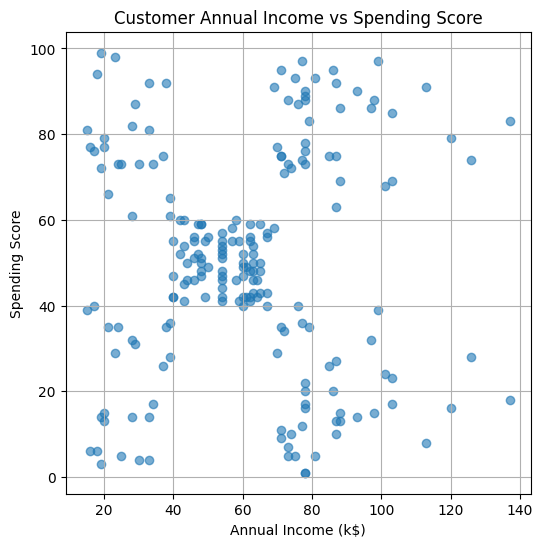

In [29]:
# Step 10  Explore Data Visually (A scatter of customer spend behavior before segmentation)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.title('Customer Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


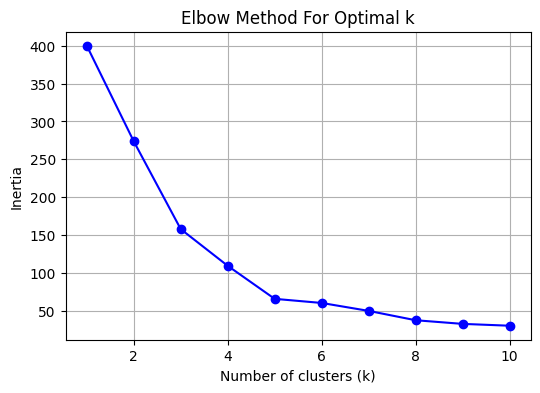

In [30]:
# Step 11 Use the Elbow Method to Pick k (📌 You’ll get a plot where the “elbow” region (often around k = 5) signals the ideal number of clusters.)
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [31]:
# Step 12  Train Final KMeans Model (labels assigns each customer to a cluster centroids are the unscaled center coordinates for interpretation.)
optimal_k = 5  # based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)


/tmp/ipython-input-40-1719910548.py:29: UserWarning: Glyph 129530 (\N{BASKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-1719910548.py:29: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-1719910548.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-1719910548.py:29: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-40-1719910548.py:29: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129530 (\N{BASKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE})

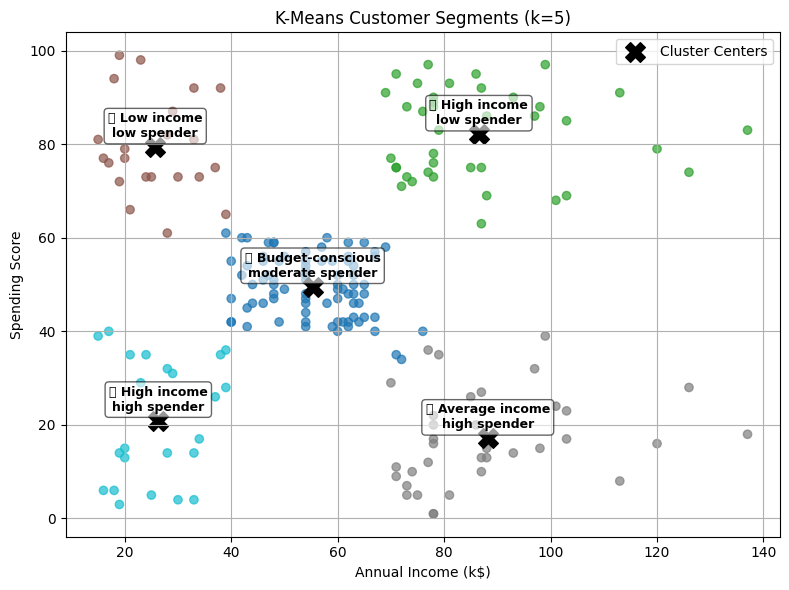

In [40]:
# Step 13 Visualize Customer Segments (Color shows each customer’s cluster.Black X marks each cluster center.)
import matplotlib.pyplot as plt

# Define cluster persona labels
cluster_descriptions = {
    0: "🧺 Budget-conscious\nmoderate spender",
    1: "💼 High income\nlow spender",
    2: "📉 Low income\nlow spender",
    3: "🎯 Average income\nhigh spender",
    4: "💎 High income\nhigh spender"
}

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Cluster Centers')

# Annotate cluster centers with descriptions
for i, (x, y) in enumerate(centroids):
    plt.text(x, y + 1.5, cluster_descriptions.get(i, f"Segment {i+1}"),
             fontsize=9, ha='center', va='bottom', fontweight='bold', bbox=dict(facecolor='white', alpha=0.6, boxstyle='round'))

# Set chart title and labels
plt.title('K-Means Customer Segments (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Building an interactive app (Gradio) to let users input new data Predict which cluster they belong to, based on what your model has learned

In [35]:
# Step 14: Build and launch Gradio app
!pip install --upgrade gradio --quiet


In [38]:
import pandas as pd
import gradio as gr
from datetime import datetime

# ✔ Define cluster descriptions (adjust if needed)
cluster_descriptions = {
    0: "🧺 Budget-conscious but moderate spender",
    1: "💼 High income, low spender",
    2: "📉 Low income, low spender",
    3: "🎯 Average income, high spender",
    4: "💎 High income, high spender"
}

# ✔ Define logging function
def log_input(income, score, segment):
    log_entry = {
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Annual Income (k$)": income,
        "Spending Score (1–100)": score,
        "Predicted Segment": segment + 1,
        "Persona": cluster_descriptions.get(segment, "Unknown")
    }
    df_log = pd.DataFrame([log_entry])
    # Append to log file
    df_log.to_csv("gradio_input_log.csv", mode='a', header=not pd.io.common.file_exists("gradio_input_log.csv"), index=False)

# ✔ Prediction function
def predict_segment(income, score):
    # Transform and predict
    data = scaler.transform([[income, score]])
    segment = kmeans.predict(data)[0]
    center = kmeans.cluster_centers_[segment]

    # Log interaction
    log_input(income, score, segment)

    # Return results
    message = f"Segment {segment + 1} – {cluster_descriptions.get(segment)}"
    return message, {
        features[0]: round(center[0], 2),
        features[1]: round(center[1], 2)
    }

# ✔ Gradio interface
iface = gr.Interface(
    fn=predict_segment,
    inputs=[
        gr.Number(label="Annual Income (k$)", value=60, minimum=0, maximum=200),
        gr.Number(label="Spending Score (1–100)", value=50, minimum=1, maximum=100),
    ],
    outputs=[
        gr.Textbox(label="Customer Segment & Persona"),
        gr.Label(label="Cluster Center (Standardized)")
    ],
    title="📊 Customer Segmentation Predictor",
    description="Enter income and spending to get customer cluster with persona"
)


In [39]:
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea8f6bca75e72cf3ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



---

## ✅ 2. 🧠 Interview Question Answer: *"Why Gradio?"*

If you're asked:  
> “Why did you choose Gradio instead of Streamlit, Flask, or Dash?”

You can answer:

> "Gradio was the best fit for this project because it's lightweight, fast to prototype, and doesn't require frontend development.  
It let me focus on the ML logic while providing an easy-to-use web interface for non-technical users.  
Since this was a portfolio/demo project, Gradio’s `share=True` feature in Colab allowed me to publish it with a single line — no server setup or deployment pipelines needed."

---

